This script generates hillslope mesh with a varying organic layer thickness at the top.

In [12]:
import sys, os
sys.path.append(os.path.join(os.environ['ATS_SRC_DIR'],'tools','meshing','meshing_ats'))
sys.path.append('./libs')
import meshing_ats
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import ats_vis as atsvis
import ats_xdmf as ats_xdmf
import pyvista as pv

# of x and z elements: 101, 101
# of cells: 100


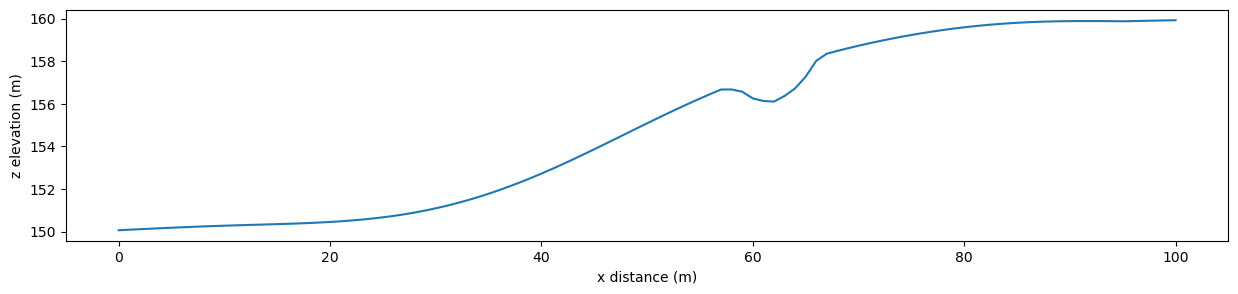

In [13]:
df = pd.read_csv('../data/Sigmoid_Hillslope_Profile.csv')

# 100 m long hillslope, 10% slope
x = df['Distance (m)'].values
z = df['Elevation (m)'].values
m2 = meshing_ats.Mesh2D.from_Transect(x,z,width=1)

fix, ax = plt.subplots(1,1, figsize=(15,3))
ax.plot(x,z)
ax.set_ylabel('z elevation (m)')
ax.set_xlabel('x distance (m)')

print(f'# of x and z elements: {len(x)}, {len(z)}')
print(f'# of cells: {m2.num_cells()}')

In [14]:
dz = 0.2

# make 3D mesh, extruding in a fixed approach
# layer extrusion
soil_thickness = 5
nz = int(np.round(soil_thickness / dz))
print(nz)

# -- data structures needed for extrusion
layer_types = ['constant']
layer_data = [soil_thickness]
layer_ncells = [nz]
layer_mat_ids = [101]

25


In [15]:
#### 1 : the bottom boundary faces of the domain
#### 2 : the top (surface) boundary faces of the domain
#### 3 : all other boundary faces (side boundaries)
#### 4-9 : reserved for user-provided sets, e.g. outlets, observation points, etc.
#### 10-99 : Land Cover side sets, typically NLCD indices are used directly
#### 100 : geologic layer material IDs, e.g. rock types
#### 999 : reserved for bedrock
#### 1000-9999 : soil layer material IDs, e.g. soil types
#### 10000+ : user-defined, no limitations

In [16]:
# make the mesh, save it as an exodus file
filename = '../data/hillslope2.exo'
m3 = meshing_ats.Mesh3D.extruded_Mesh2D(m2, layer_types, layer_data, layer_ncells, layer_mat_ids)
if os.path.exists(filename):
    os.remove(filename)
m3.write_exodus(filename)

Opening exodus file: ../data/hillslope2.exo
Closing exodus file: ../data/hillslope2.exo


In [17]:
domain_mesh = atsvis.load_mesh_exodus(filename, z_scale=0.0001)
pl = atsvis.plot_mesh(domain_mesh, show_scalar_bar=True, set_background=False, 
                      show_toplayer=False, window_size=[1200, 600])

Widget(value='<iframe src="http://localhost:61941/index.html?ui=P_0x3166dbb60_0&reconnect=auto" class="pyvista…